<a href="https://colab.research.google.com/github/NHJee/class_Python-for-DL/blob/main/%ED%98%BC%EC%9E%90_%ED%95%B4%EB%B3%B4%EB%8A%94_chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 신경망과의 첫 만남

In [ ]:
# 케라스에서 MNIST 데이터셋 적재하기

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# train_images, train_labels가 모델이 학습해야 할 훈련 셋
# test_images, test_labels가 모델이 테스트 할 테스트 셋

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# 신경망 구조

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

# layer = 층
# 처음 6만개의 데이터를 512개로 한 번 걸러내고
# 마지막 10개의 데이터로 걸러내는 작업

In [ ]:
# 컴파일 단계

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# 이미지 데이터 준비하기

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

# .reshape = 훈련 시작 전, 데이터를 모델에 맞는 크기로 바꿔야된다.
# .astype = 0과 1 사이의 값을 갖게 해야돼서 float32 타입을 픽셀의 최댓값인 255로 나눠준다.

In [ ]:
# 모델 훈련하기

model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

# .fit = 훈련시키기
# epochs = 데이터를 총 5번 반복해서 훈련시킨다. -> 손실이 적어짐
# batch_size = 한 번에 많은 양의 데이터를 돌리면 과부화가 걸리니까 랜덤으로 뽑힌 128개의 데이터를 돌린다.

# 실행 시키면
# loss = 모델의 손실
# acc = 모델의 정확도 가 출력된다.

Epoch 1/5
469/469 [==============================] - 18s 33ms/step - loss: 0.2629 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1068 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0701 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0513 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0383 - accuracy: 0.9886


In [ ]:
# 모델을 사용하여 예측 만들기

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

# predictions[0]에서 7번째 값이 9.99로 가장 높게 나와 모델의 예측 결과는 7이 된다.

1/1 [==============================] - 0s 84ms/step


array([2.0284388e-08, 5.4449614e-09, 1.7116732e-06, 2.5973874e-05,
       1.5673092e-12, 1.5082540e-07, 1.4649807e-12, 9.9997026e-01,
       7.5337041e-08, 1.6990689e-06], dtype=float32)

In [ ]:
# .argmax() = 가장 큰 값을 같는 인덱스를 찾아준다.

predictions[0].argmax()

7

In [ ]:
# 테스트 데이터의 레이블과 맞는지 확인

test_labels[0]

7

In [ ]:
# 새로운 데이터에서 모델 평가하기

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도 : {test_acc}")

# 훈련 세트의 정확도 : 98.9 > 테스트 세트의 정확도 : 97.3
# 과대적합 때문에 정확도가 약간 낮아진다.

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9795
테스트 정확도 : 0.9794999957084656


# 2.2 신경망을 위한 데이터 표현

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 축의 갯수 확인하기 (rank)

train_images.ndim

3

In [ ]:
# .shape = 배열의 크기

train_images.shape

(60000, 28, 28)

In [ ]:
# .dtype = 데이터 타입

train_images.dtype

dtype('uint8')

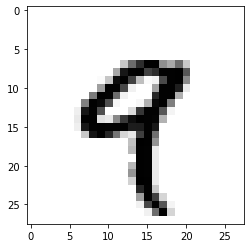

In [ ]:
# 다섯 번 째 이미지 출력하기

import matplotlib.pyplot as plt

digit = train_images[4] # 파이썬은 0부터 세기 때문에 4로 넣어줌
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [ ]:
# 슬라이싱

my_slice = train_images[10 : 100] # 11번째 값부터 100번째 값까지의 숫자를 선택 = 총 90개
my_slice.shape

(90, 28, 28)

혼자 해보는 예제

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2628 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1056 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0696 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0506 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0384 - accuracy: 0.9880


In [ ]:
test_digits = test_images[:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 181ms/step


array([3.4160649e-08, 1.9310828e-09, 3.9658389e-06, 1.0426455e-05,
       2.5735308e-11, 9.8947083e-08, 7.5959898e-12, 9.9998146e-01,
       8.8651454e-08, 3.8826583e-06], dtype=float32)